# LeNet-5 Implementation in Keras for MNIST Digits Dataset

Based on this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann Lecun, Leon Bottou, Yoshua Benigo, and Ptrick Haffner in 1998. This implementation uses 28x28 input images instaed of 32x32 and uses the ReLU activation function instead of the sigmoid function.

### Documentation of Libraries annd Frameworks


*   [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
*   [Matplotlib](https://matplotlib.org/contents.html)
*   [Keras](https://keras.io/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, AveragePooling2D, Flatten, Activation
from keras.datasets import mnist
from keras.losses import categorical_crossentropy
from keras import utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
#import mnist data
(x_train_orig, y_train), (x_test_orig, y_test) = mnist.load_data()

In [3]:
#dimensions of dataset
print('x_train_orig shape: ' + str(x_train_orig.shape))
print('y_train shape: ' + str(y_train.shape))
print('x_test_orig shape: ' + str(x_test_orig.shape))
print('y_test shape: ' + str(y_test.shape))

x_train_orig = x_train_orig / 255
x_test_orig = x_test_orig / 255
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#reshape x_train and x_test for convolutions
x_train = np.reshape(x_train_orig, [-1, 28, 28, 1])
x_test = np.reshape(x_test_orig, [-1, 28, 28, 1])
print()
print('Reshaped:')
print('x_train shape: ' + str(x_train.shape))
print('x_test shape: ' + str(x_test.shape))


x_train_orig shape: (60000, 28, 28)
y_train shape: (60000,)
x_test_orig shape: (10000, 28, 28)
y_test shape: (10000,)

Reshaped:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


This is an image of a [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


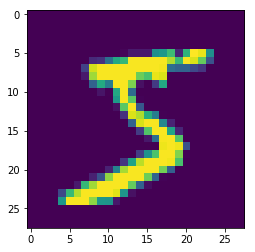

In [4]:
#visualize image from training set
index = 0
print('This is an image of a ' + str(y_train[index]))
plt.imshow(x_train_orig[index])

In [5]:
#input images
X_input = Input(shape=(28,28,1))
#6 5x5 filters
X = Conv2D(filters=6, kernel_size=(5,5), activation='relu', name='conv1')(X_input)
#average pooling 2x2
X = AveragePooling2D(pool_size=(2, 2), name='pool1')(X)
#16 5x5 filters
X = Conv2D(filters=16, kernel_size=(5,5), activation='relu', name='conv2')(X)
#average pooling 2x2
X = AveragePooling2D(pool_size=(2, 2), name='pool2')(X)
X = Flatten()(X)
X = Dense(units=120, activation='relu', name='dense1')(X)
X = Dense(units=84, activation='relu', name='dense2')(X)
X = Dense(units=10, activation='softmax',name='dense3')(X)
model = Model(inputs = X_input, outputs = X, name="lenet5")
model.compile('Adam', loss=categorical_crossentropy, metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 6)         156       
_________________________________________________________________
pool1 (AveragePooling2D)     (None, 12, 12, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 16)          2416      
_________________________________________________________________
pool2 (AveragePooling2D)     (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense1 (Dense)               (None, 120)               30840     
__________

In [6]:
def predictNum(index):
    print("The model predicted " +str(np.argmax(model.predict(x_test[index:index + 1]))))
    print('This is an image of a ' + str(np.argmax(y_test[index])))
    plt.imshow(x_test_orig[index])

The model predicted 1
This is an image of a 1


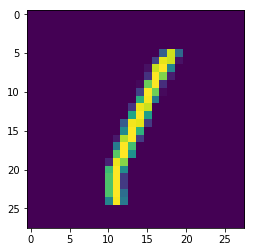

In [7]:
predictNum(506)

In [8]:
model.save('test.h5')